In [15]:
#NAME: Swetha Kanduri
#Week 10

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [17]:
# Load the datasets
first = pd.read_csv("first.csv")
second = pd.read_csv("second.csv")
third = pd.read_csv("third.csv")
fourth = pd.read_csv("fourth.csv")

In [18]:
# Helper function to extract features and labels
def extract_X_y(df):
    X = df[["x", "y"]].values
    y = df["result"].values
    return X, y

In [19]:
# Storage for step labels and metrics
steps = ['Dummy', 'KNN Training', 'KNN Prediction', 'KNN Retraining', 'KNN Retrained Prediction']
accuracy = []
precision = []
recall = []


In [20]:
# Step 1: Dummy classifier on first.csv
X, y = extract_X_y(first)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, zero_division=0))
recall.append(recall_score(y_test, y_pred, zero_division=0))

# Step 2: KNN training on first.csv
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy.append(accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, zero_division=0))
recall.append(recall_score(y_test, y_pred, zero_division=0))

# Step 3: Predict second.csv using trained KNN
X2, y2 = extract_X_y(second)
y_pred2 = knn.predict(X2)
accuracy.append(accuracy_score(y2, y_pred2))
precision.append(precision_score(y2, y_pred2, zero_division=0))
recall.append(recall_score(y2, y_pred2, zero_division=0))

# Step 4: Retrain KNN on third.csv
X3, y3 = extract_X_y(third)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.4, random_state=42)
knn_retrain = KNeighborsClassifier(n_neighbors=5)
knn_retrain.fit(X_train3, y_train3)
y_pred3 = knn_retrain.predict(X_test3)
accuracy.append(accuracy_score(y_test3, y_pred3))
precision.append(precision_score(y_test3, y_pred3, zero_division=0))
recall.append(recall_score(y_test3, y_pred3, zero_division=0))

# Step 5: Predict on fourth.csv using retrained KNN
X4, y4 = extract_X_y(fourth)
y_pred4 = knn_retrain.predict(X4)
accuracy.append(accuracy_score(y4, y_pred4))
precision.append(precision_score(y4, y_pred4, zero_division=0))
recall.append(recall_score(y4, y_pred4, zero_division=0))

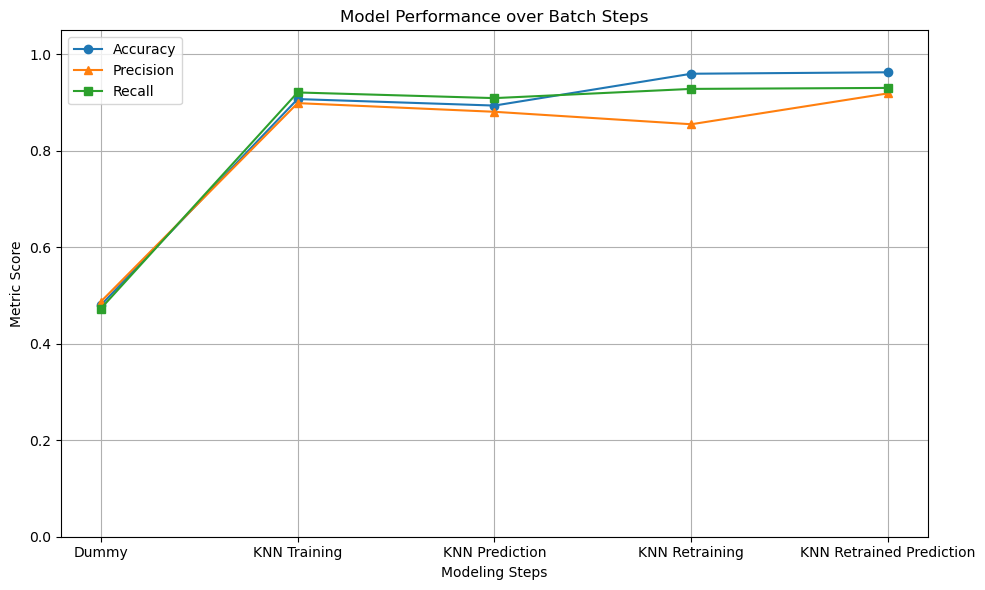

In [21]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(steps, accuracy, marker='o', label='Accuracy')
plt.plot(steps, precision, marker='^', label='Precision')
plt.plot(steps, recall, marker='s', label='Recall')
plt.title('Model Performance over Batch Steps')
plt.xlabel('Modeling Steps')
plt.ylabel('Metric Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()